<h1>Iris Flower data set </h1>

<h4> The aim of this exercise is to perform machine learning algorithms, such as classification, to group species of flowers based on shared morphological traits.</h4>

<p>The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.</p>
    
<p>The Iris dataset was used in R.A. Fisher's classic 1936 paper, 'The Use of Multiple Measurements in Taxonomic Problems'. It can be found on the UCI Machine Learning Repository and on kaggle (https://www.kaggle.com/uciml/iris). </p>



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#k nearest library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#normalisation
from sklearn import preprocessing

#train test split
from sklearn.model_selection import train_test_split

#accuracy visualisation
from sklearn import metrics


## Loading the data

In [2]:
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Understanding the data

How many species we have in our dataset?

In [ ]:
df['species'].unique()

Let's visualise this in a histogram

In [ ]:
sns.countplot(x='species', data=df)
plt.title('Flower Species')

There are 50 entries per specie so the analysis will be based on an equal amount of data

In [ ]:
df.describe()

Let's see if each specie has more distinct characteristic. For this, we will see the mean for each specie.

In [ ]:
df.groupby("species").mean()

We will visualise this by pairplot, in order to plot all the features together in a single figure

In [ ]:
sns.pairplot(df, hue='species')
plt.show()

We can notice that there are clusters of data and species are differentiated somehow. For example, iris-setosa is separated from the other species in all the features. It is less obvious for Iris-versicolor and Iris virginica but they also have specific clusters when it comes to petal length and petal width. This indicates that a classification approach will likely be very successful. 

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array. X will be our independant variables and y will be the dependant variables.

In [3]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values  #.astype(float)

X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Let's look at the lables

In [4]:
y=df['species'].values
y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

## Normalize data

Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases


In [74]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

### Train test split

Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

#### Notes
<ul>
    <li>The accuracy score of the models depends on the observations in the testing set, which is determined by the seed of the pseudo-random number generator (random_state parameter). In this case, we chose a random_state=4 but we can also do this by simply not providing a random_state and it will pick one randomly using np.random.</li> </ul>


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


In this case, we used 20% of the dataset as a testing data. This means that 30 out of 150 entries will be used as a testing set later on to check the accuracy of the model.

## Classification
### K-nearest neighbor (KNN)

## Training
We will use a k=20. Note that you can start with any value of k then adjust it after testing of the accuracy of different k values

In [82]:
k = 20

#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

#### Predicting
We can use the model to predict the test set:

In [83]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

#### Accuracy evaluation

In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.


In [84]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9666666666666667
Test set Accuracy:  0.9666666666666667


#### What about other K?

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the User. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different Ks.

In [85]:
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.9       , 0.93333333, 0.9       , 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 0.93333333, 0.96666667,
       0.96666667, 0.96666667, 0.96666667, 0.93333333, 0.93333333,
       0.93333333, 0.96666667, 0.93333333, 0.93333333])

Plotting this model

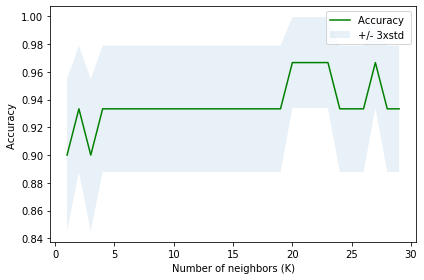

In [86]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of neighbors (K)')
plt.tight_layout()
plt.show()

In [81]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9666666666666667 with k= 20


Using a k=20 gives a higher accuracy. Therefore, the calculation was repeated with k=20.

## Predict the specie

Now that we have built the data model and that the accuracy is quite high, we can incorporate all the test scores into the training model. This means that we don't have to split the data anymore. 

In [87]:
knn = KNeighborsClassifier(n_neighbors=12).fit(X,y)
print("Train set Accuracy: ", metrics.accuracy_score(y, neigh.predict(X)))

In order to predict the specie, we will use the .predict function:

In [93]:
dimensions=[6, 3, 4, 2]
predict=knn.predict([dimensions])
print("The following flower with the dimensions of ", dimensions, "belong to the ", predict, "specie.")

The following flower with the dimensions of  [6, 3, 4, 2] belong to the  ['Iris-virginica'] specie.
